#### 例1-1 读入excel文件“WPP2022_人口统计学数据.xlsx”的数据，
    （1）只显示Local、Time、To1July、PopDensity、PopSexRatio、PopGrowthRate、DoublingTime、TFR
    （2）设置"Time"为行索引

In [4]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)  #设置显示格式

df1=pd.read_excel(r".\WPP2022_人口统计学数据.xlsx",index_col='Time',usecols=[6,9,11,14,15,20,21,25])    #usecols中用列索引号
df1.head()                                                #head()查看前5条记录

,Local,To1July,PopDensity,PopSexRatio,PopGrowthRate,DoublingTime,TFR
Time,,,,,,,
1950,World,2499322.2,19.2,99.3,1.7,40.0,4.9
1951,World,2543130.4,19.5,99.4,1.7,39.8,4.8
1952,World,2590270.9,19.9,99.4,1.9,35.9,5.0
1953,World,2640278.8,20.2,99.5,1.9,36.6,4.9
1954,World,2691979.3,20.6,99.5,2.0,35.0,5.0


## 一、相关系数矩阵

    df.corr(method='pearson')
    说明：
    (1) corr方法返回一个相关系数矩阵，矩阵的行和列对应数据框的列名，矩阵的元素是对应列之间的相关系数。
    (2) method的值： Pearson 和 Spearman
        Pearson：即皮尔逊相关系数，用于衡量了两个变量之间的线性关系强度和方向。它的取值范围在 -1 到 1 之间，其中 -1 表示完全负相关，1 表示完全正相关，0 表示无线性相关。
        Spearman：即斯皮尔曼相关系数，用于衡量两个变量之间的单调关系，即不一定是线性关系。

In [5]:
#练习1，求"PopDensity"（截至7月1日的人口密度）,"PopSexRatio"（截至7月1日的人口性别比）,"PopGrowthRate"（人口增长率）,"TFR"（总生育率）各属性的相关系数矩阵
#保存至df3
df=df1.copy()
df2=df[df["Local"]=="China"][["PopDensity","PopSexRatio","PopGrowthRate","TFR"]]
df3=df2.corr()
df3

,PopDensity,PopSexRatio,PopGrowthRate,TFR
PopDensity,1.0,-0.2,-0.3,-0.7
PopSexRatio,-0.2,1.0,0.6,0.5
PopGrowthRate,-0.3,0.6,1.0,0.8
TFR,-0.7,0.5,0.8,1.0


## 二、热力图
    import seaborn as sns
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f")
    说明：
    （1）由df的数据生成热力图
    （2）annot=True表示在图上显示数值大小
    （3）cmap设置图的颜色配置方案
    （4）fmt数字格式
    （5）vmin,vmax设置颜色区分的最小值、最大值

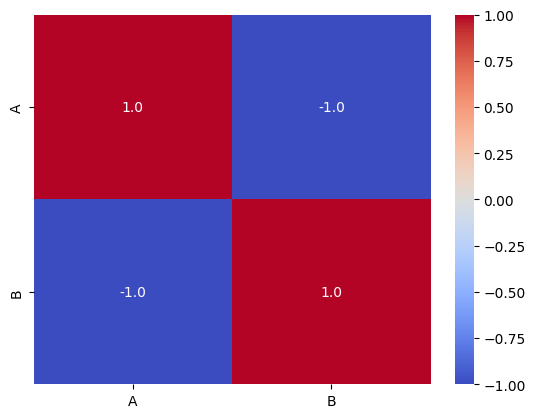

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 创建一个示例数据框
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)
# 创建一个相关性矩阵
correlation_matrix = df.corr()

# 使用热图可视化相关性矩阵
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.show()


<Axes: >

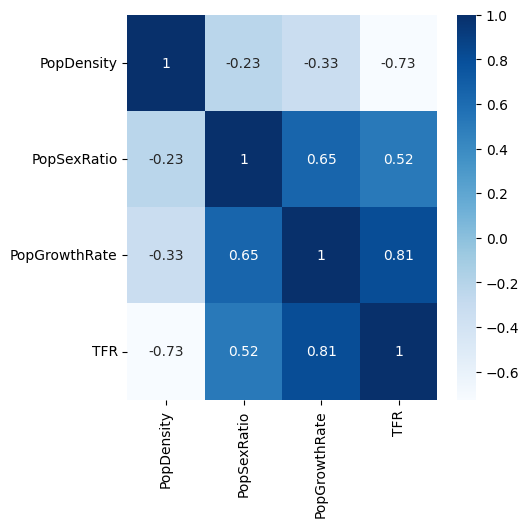

In [7]:
#练习2，绘制相关系数矩阵df3的热力图
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df3,annot=True,cmap="Blues")

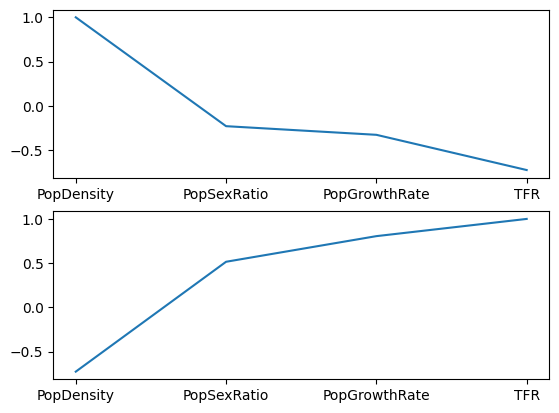

In [8]:
#练习3，绘制两个图形：
#"PopDensity"与其他属性的相关系数折线图、"TFR"与其他属性的相关系数折线图
import matplotlib.pyplot as plt
import seaborn as sns

ax1=plt.subplot(211)
ax1.plot(df3.index,df3["PopDensity"])
ax2=plt.subplot(212)
ax2.plot(df3.index,df3["TFR"])

<Axes: >

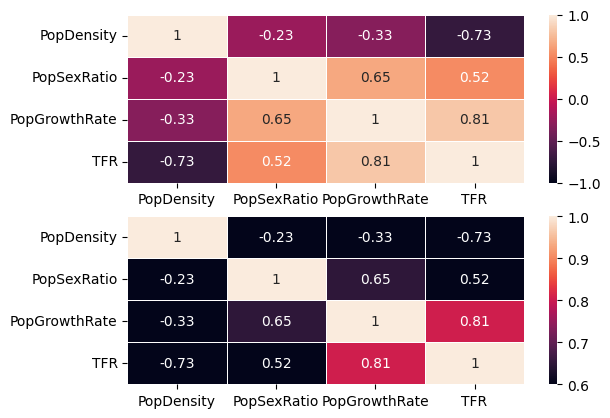

In [9]:
#练习3，绘制两个热力图：一个vmin=-1，一个vmin=0.6

ax1=plt.subplot(211)               #ax1是2行1列的第一块画图区域
ax2=plt.subplot(212)               #ax2是2行1列的第二块画图区域

sns.heatmap(df3, annot=True, linewidths=.5,vmin=-1,vmax=1,ax=ax1)   #画在ax1区域
sns.heatmap(df3, annot=True, linewidths=.5,vmin=0.6,vmax=1,ax=ax2)

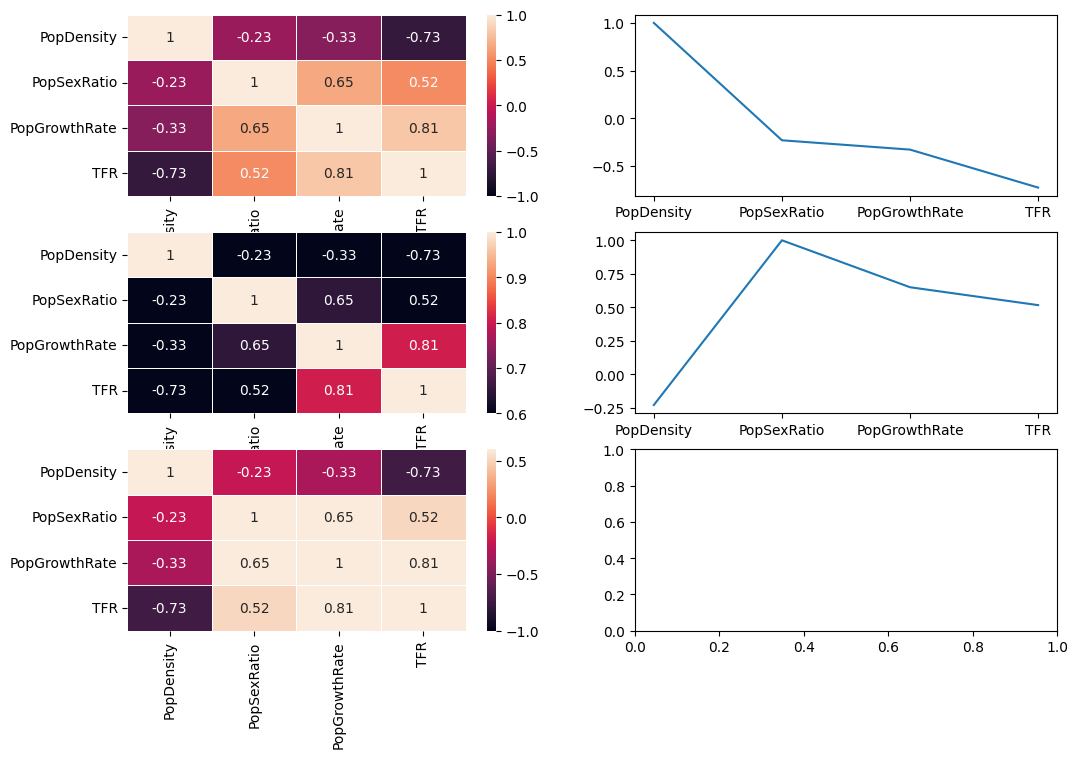

In [10]:
#绘制3行2列的画图区域：
#将两个热力图画在左边，折线图画在右边

fig, ax = plt.subplots(3,2,figsize=(12, 8))    #分割成3行2列的6个区域    
#分割后各区域分别为ax[0,0]、ax[0,1]、ax[1,0]、ax[1,1]、ax[2,0]、ax[2,1]

sns.heatmap(df3, annot=True, linewidths=.5,vmin=-1,vmax=1,ax=ax[0,0])  #[0,0]区域画热力图
sns.heatmap(df3, annot=True, linewidths=.5,vmin=0.6,vmax=1,ax=ax[1,0])  #[1,0]区域画热力图
sns.heatmap(df3, annot=True, linewidths=.5,vmin=-1,vmax=0.6,ax=ax[2,0])  #[2,0]区域画热力图
ax[0,1].plot(df3.index,df3["PopDensity"])
ax[1,1].plot(df3.index,df3["PopSexRatio"])

## 练习一：
（1）取df["Local"]=="China"的"To1July"（截至7月1日的总人口）,"PopGrowthRate","DoublingTime"（人口年倍增时间）,"TFR"

（2）求相关系数矩阵，并画热力图。观察哪些属性有相关性。

<Axes: >

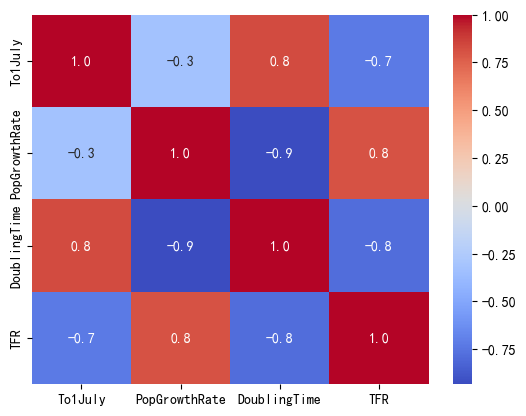

In [20]:
df=df1.copy()
df_1=df[df['Local']=='China'][['To1July','PopGrowthRate','DoublingTime','TFR']]
# df_1
df_2=df_1.corr()
sns.heatmap(df_2,annot=True, cmap='coolwarm', fmt=".1f")
# plt.show()




## 三、双坐标显示（观察双变量的趋势关系）
    
    双坐标系，共x轴，2个y轴（主坐标轴、次坐标轴），在一个图形中显示两个不同坐标尺度的图表

    twinx()函数：创建并返回一个共享x轴的子图

In [12]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']     
matplotlib.rcParams['axes.unicode_minus'] = False 

#在一张图上建立双坐标系，绘制PopDensity的柱形图、PopGrowthRate的折线图，观察两变量的关系
df4=df2.copy()
df5=df4[ 70:]
x = df5.index
df5.head()

,PopDensity,PopSexRatio,PopGrowthRate,TFR
Time,,,,
2020,148.4,104.5,0.1,1.3
2021,148.5,104.3,0.0,1.2
2022,148.5,104.2,-0.0,1.2
2023,148.5,104.1,-0.0,1.2
2024,148.5,104.0,-0.0,1.2


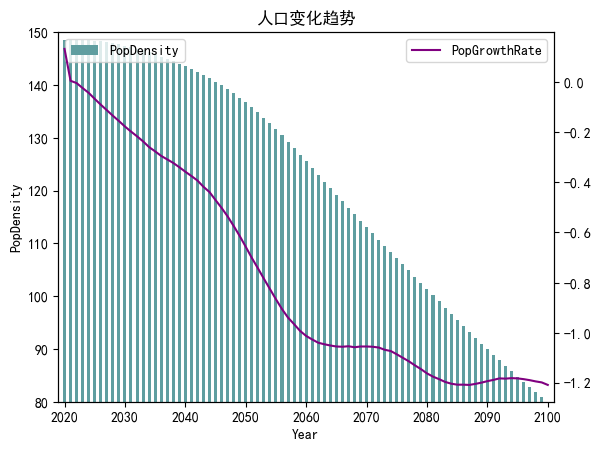

In [13]:
Density_y = df5["PopDensity"]
GrowthRate_y = df5["PopGrowthRate"]

plt.xlabel('Year')
plt.ylabel('PopDensity')
plt.ylim(80,150)
plt.margins(x=0.01)
plt.title('人口变化趋势')
plt.bar(x, height=Density_y, color='cadetblue', width=0.5, label='PopDensity')
plt.legend(loc=2)

ax2 = plt.twinx()                #创建一个共x轴的子图，产生镜面坐标
ax2.margins(x=0.01)
ax2.plot(x, GrowthRate_y, color='purple', label='PopGrowthRate')     #ax2上画折线图

ax2.legend()
plt.savefig("1.png",dpi=600)

## 练习二：
在一张图上建立双坐标系，绘制df5的PopDensity的柱形图、TFR的折线图，观察两变量的关系

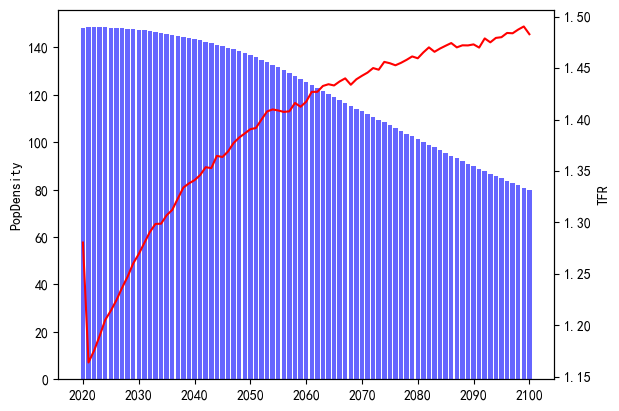

In [27]:
df4=df2.copy()
df5=df4[ 70:]

plt.bar(df5.index, df5['PopDensity'], color='blue', alpha=0.6)
plt.ylabel('PopDensity')
ax1=plt.twinx()
ax1.plot(df5.index, df5['TFR'], color='red')
ax1.set_ylabel('TFR')
plt.show()








